# AAISHA SIDDIQAH

# Predict Vehicle Prices using Vehicle dataset

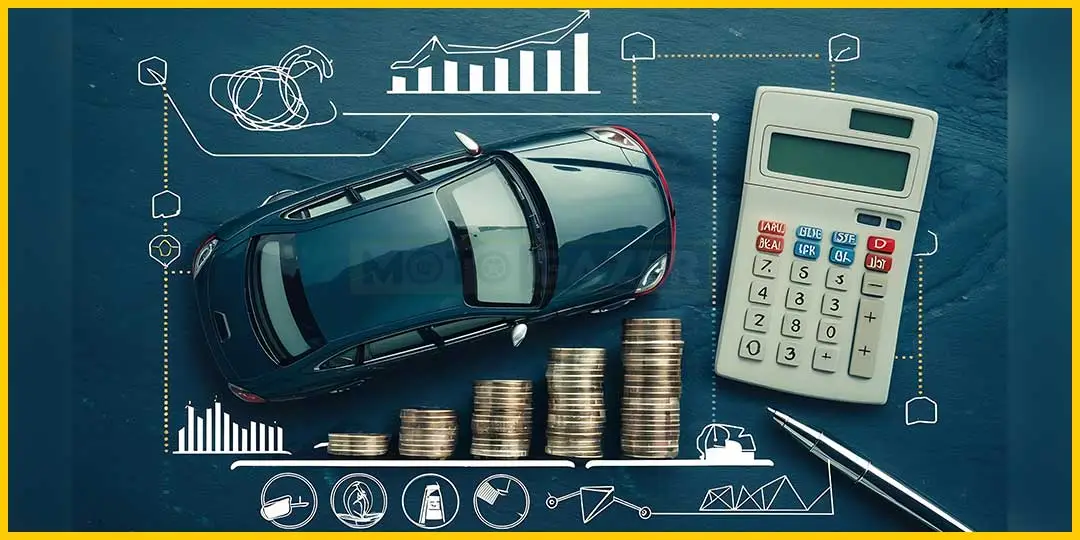

Objective:

Build a system that can predict the prices for vehicles using data on Vehicle specifications,
make, etc. Explore the data to understand the features and figure out an approach.

Dataset:

This dataset contains data on various vehicles, their features, and prices.

Description of columns:

● name: The full name of the vehicle, including make, model, and trim.

● description: A brief description of the vehicle, often including key features and selling points.

● make: The manufacturer of the vehicle (e.g., Ford, Toyota, BMW).

● model: The model name of the vehicle.

● year: The year the vehicle was manufactured.

● price: The price of the vehicle in USD.

● engine: Details about the engine, including type and specifications.

● cylinders: The number of cylinders in the vehicle's engine.

● fuel: The type of fuel used by the vehicle (e.g., Gasoline, Diesel, Electric).

● mileage: The mileage of the vehicle, typically in miles.

● transmission: The type of transmission (e.g., Automatic, Manual).

● trim: The trim level of the vehicle, indicating different feature sets or packages.

● body: The body style of the vehicle (e.g., SUV, Sedan, Pickup Truck).

● doors: The number of doors on the vehicle.

● exterior_color: The exterior color of the vehicle.

● interior_color: The interior color of the vehicle.

● drivetrain: The drivetrain of the vehicle (e.g., All-wheel Drive, Front-wheel Drive).



# Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Step 2: Load Dataset

In [ ]:
df = pd.read_csv('dataset.csv')  # replace with your filename
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


# Step 3: Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

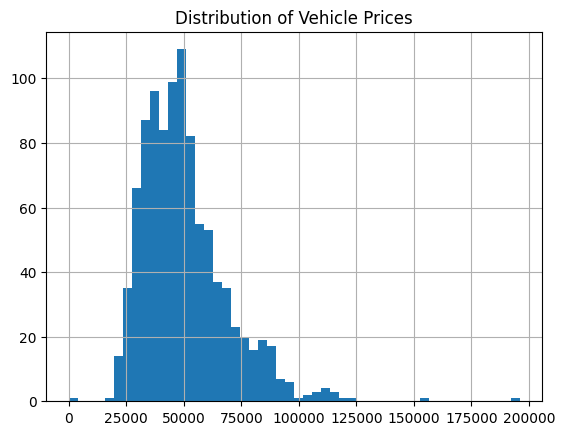

In [ ]:
df.info()
df.describe()
df.isnull().sum()
df['price'].hist(bins=50)
plt.title("Distribution of Vehicle Prices")
plt.show()


# Step 4: Preprocessing

In [ ]:
# Drop unnecessary text features
df = df.drop(['name', 'description'], axis=1)

# Drop rows with missing target
df = df.dropna(subset=['price'])

# Fill or drop remaining missing values
df = df.dropna()

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Select categorical and numerical features
categorical = X.select_dtypes(include='object').columns.tolist()
numerical = X.select_dtypes(exclude='object').columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])


KeyError: "['name', 'description'] not found in axis"

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 1001
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   make            800 non-null    object 
 1   model           800 non-null    object 
 2   year            800 non-null    int64  
 3   price           800 non-null    float64
 4   engine          800 non-null    object 
 5   cylinders       800 non-null    float64
 6   fuel            800 non-null    object 
 7   mileage         800 non-null    float64
 8   transmission    800 non-null    object 
 9   trim            800 non-null    object 
 10  body            800 non-null    object 
 11  doors           800 non-null    float64
 12  exterior_color  800 non-null    object 
 13  interior_color  800 non-null    object 
 14  drivetrain      800 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 100.0+ KB


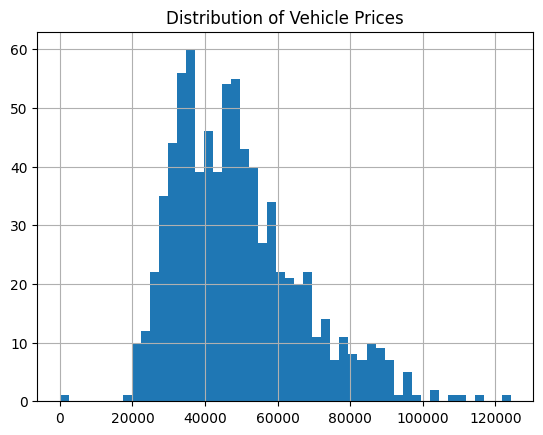

In [ ]:
df.info()
df.describe()
df.isnull().sum()
df['price'].hist(bins=50)
plt.title("Distribution of Vehicle Prices")
plt.show()

# Step 5: Model and Train-Test Split

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline
model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'cylinders',
                                                   'mileage', 'doors']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model', 'engine',
                                                   'fuel', 'transmission',
                                                   'trim', 'body',
                                                   'exterior_color',
                                                   'interior_color',
                                                   'drivetrain'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# Step 6: Evaluation

In [ ]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 3945.815368377976
MSE: 32176923.432791602
RMSE: 5672.470663898722
R2 Score: 0.8866923986381102


# Optional Steps

In [ ]:
#Try Other Models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Try Linear Regression
lr_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])
lr_model.fit(X_train, y_train)
print("Linear Regression R2:", r2_score(y_test, lr_model.predict(X_test)))


Linear Regression R2: 0.8398529978426904


In [ ]:
#GridSearchCV for Tuning

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20]
}

grid = GridSearchCV(model, param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best R2 Score:", grid.best_score_)

Best Params: {'regressor__max_depth': None, 'regressor__n_estimators': 200}
Best R2 Score: 0.789539674690834


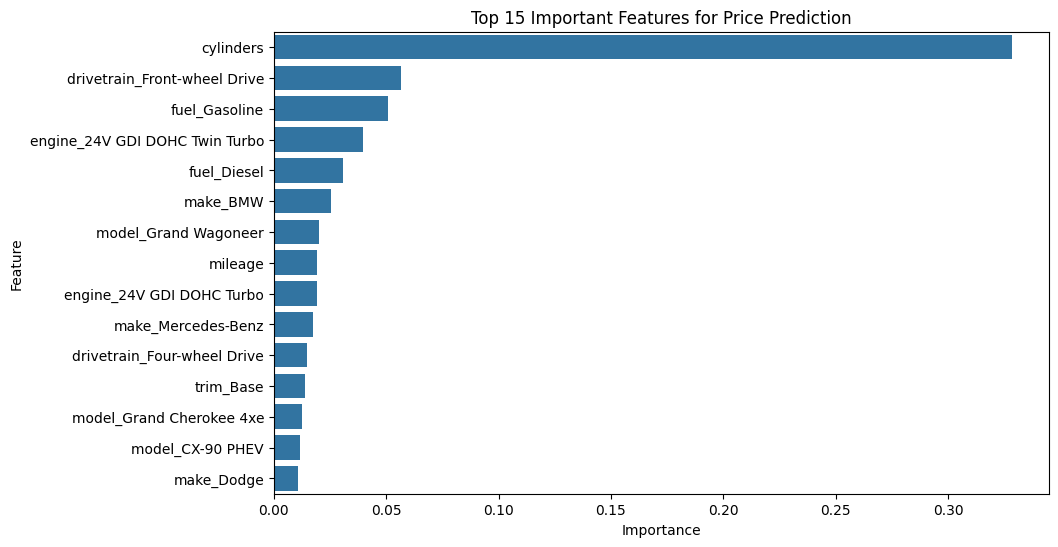

In [ ]:
# Feature Importance

# Extract feature names after encoding
encoded_features = grid.best_estimator_['preprocess'].transformers_[1][1].get_feature_names_out(categorical)
all_features = numerical + list(encoded_features)

importances = grid.best_estimator_['regressor'].feature_importances_
feat_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))
plt.title("Top 15 Important Features for Price Prediction")
plt.show()

# PCA for Vehicle Dataset (after preprocessing)

In [ ]:
#Step 1: Preprocess (Encode + Scale)

# Use same preprocessor: encoding + scaling
X_processed = preprocessor.fit_transform(X)

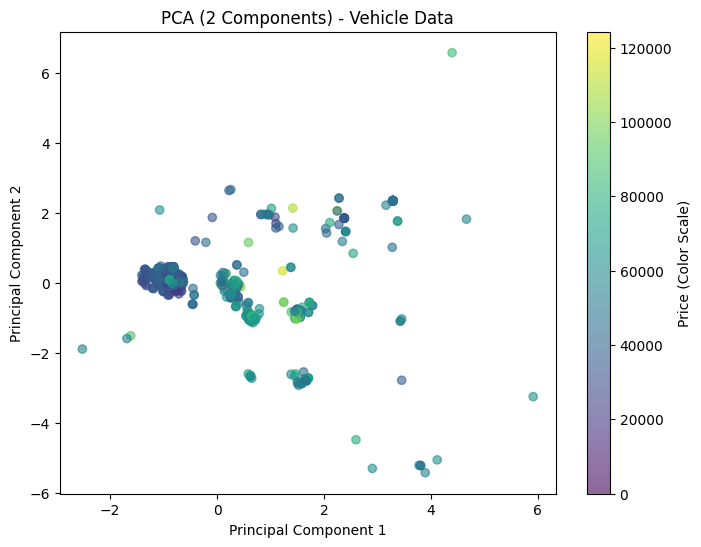

In [ ]:
#Step 2: Apply PCA

from sklearn.decomposition import PCA

# Try 2D PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed.toarray())  # toarray() is needed if it's a sparse matrix

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.6)
plt.title("PCA (2 Components) - Vehicle Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Price (Color Scale)")
plt.show()


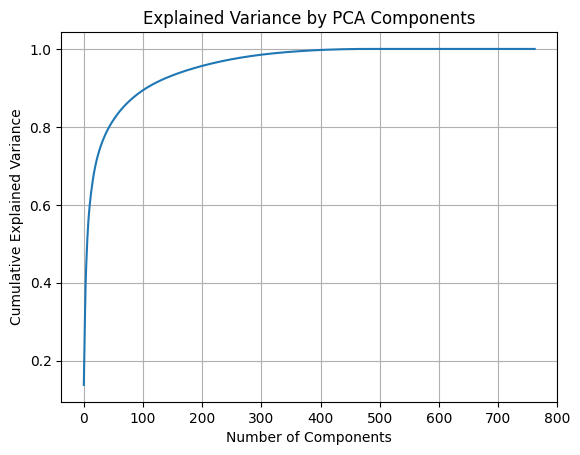

In [ ]:
#Variance Explained by PCA

pca_full = PCA().fit(X_processed.toarray())
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()